### Demo computing horizon height for a single surface point (grid-cell) in the landcape

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dem_horizon as h

# import dem example, from Pallas Lompolojanganoja
demfile = r'sve_1_dem_16m_aggr.asc'

dem, lat, lon, _ = h.read_AsciiGrid(demfile)


rows, cols (233, 160)


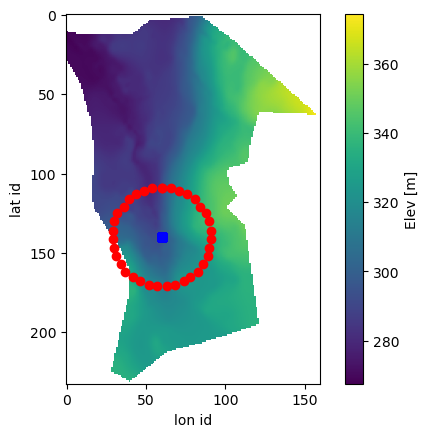

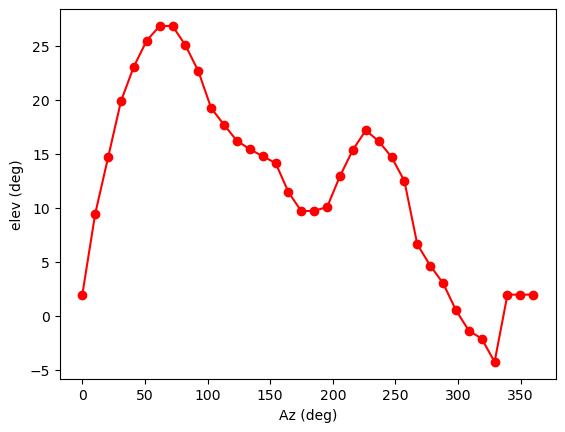

In [6]:
# set parameters
dx = 16.0 # dem resolution (m)
view_dist = 500.0 # maximum viewing distance
sectors = 36 # sectors = 360 (deg) / azimuth interval (deg), must be integer

# create Horizon object
H = h.Horizon(dem, dx=16)
print('rows, cols', H.shape)

# let's compute horizon for point Lat_ix = 40, Lon_ix 50
lat_ix = 140
lon_ix = 60
P0 = h.Point(lat_ix, lon_ix, dem[lat_ix, lon_ix])

# calculate horizon height angle (deg)
Az = np.linspace(0, 360, sectors)

Az, elev_angle, terrain_profile = H.calc_horizon(P0, R=view_dist, Az_deg=Az, figs=True)

Text(0.5, 0, 'distance from target [m]')

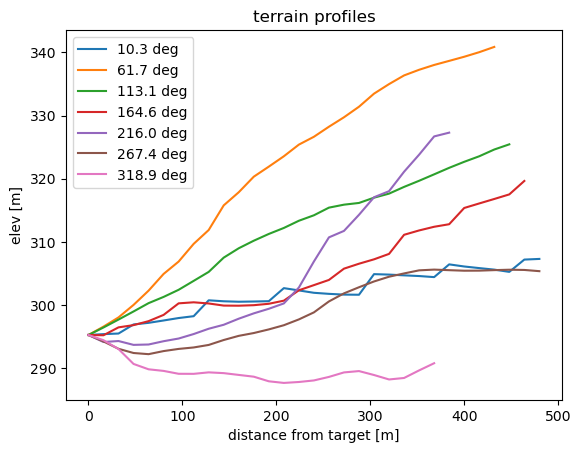

In [8]:
# plot elevation profiles for few directions

Az_ix = np.arange(1, len(Az), 5)

plt.figure()

for k in range(len(Az_ix)):
    y = (terrain_profile['elev'][Az_ix[k]])
    x = np.arange(0, len(y)) * dx
    s = '%.1f deg' % terrain_profile['Az'][Az_ix[k]]
    plt.plot(x, y, '-', label=s)

plt.legend()
plt.title('terrain profiles')
plt.ylabel('elev [m]')
plt.xlabel('distance from target [m]')